This Jupyter Notebook is used for exploring the problem of creating Sankey diagram of changes for a specific user in specific repo.

In [371]:
import json
from collections import Counter
from pathlib import Path
from typing import Optional

# data analysis
import numpy as np
import pandas as pd

# plotting
import holoviews as hv

Note that after importing HoloViews as `hv` we need to run `hv.extension()` to load the appropriate plotting extension, allowing us to generate visualizations.

Even though we can happily create, analyze, and manipulate HoloViews objects without using any plotting backend, the `hv.extension()` command is normally executed just after importing HoloViews so that objects can have a rich graphical representation rather than the very-limited textual representation.

The supported HoloViews backends include ‘bokeh’, ‘matplotlib’, and ‘plotly’; the first extension given as parameter to `hv.extension()` will be the default extension.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
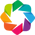

In [105]:
# no need for interactivity when examining Sankey diagrams, so 'matplotlib' would be enough
# but the code copied from `02-contributors_graph.ipynb` assumes 'bokeh' backend
hv.extension('bokeh')

# currently using 'matplotlib' creates the following problem:
# ValueError: Unexpected option 'width' for Sankey type across all extensions. Similar options for current extension ('matplotlib') are: ['cbar_width', 'node_width'].

# Sankey - directory structure of changes

Possible engines:
- Mermaid.js: <https://mermaid.js.org/syntax/sankey.html>
- Plotly (go.Sankey)
- HoloViews (hv.Sankey)
- ...

In [2]:
%pwd

'/home/jnareb/python-diff-annotator/notebooks/panel'

In [3]:
%ls ../../data/examples/stats/

git.lines-stats.json
git.lines-stats.purpose-to-type.json
git.purpose-counter.json
git.purpose-per-file.json
git.timeline.json
git.timeline.purpose-to-type.json
hellogitworld.lines-stats.json
hellogitworld.lines-stats.purpose-to-type.json
hellogitworld.purpose-counter.json
hellogitworld.purpose-per-file.json
hellogitworld.timeline.json
hellogitworld.timeline.purpose-to-type.json
linux.lines-stats.json
linux.lines-stats.purpose-to-type.json
linux.purpose-counter.json
linux.purpose-per-file.json
linux.timeline.json
linux.timeline.purpose-to-type.json
qtile.lines-stats.json
qtile.lines-stats.purpose-to-type.json
qtile.purpose-counter.json
qtile.purpose-per-file.json
qtile.timeline.json
qtile.timeline.purpose-to-type.json
tensorflow.lines-stats.json
tensorflow.lines-stats.purpose-to-type.json
tensorflow.purpose-counter.json
tensorflow.purpose-per-file.json
tensorflow.timeline.json
tensorflow.timeline.purpose-to-type.json


## Read and process data

### lines-stats data

In [20]:
with open('../../data/examples/stats/qtile.lines-stats.purpose-to-type.json', mode='r') as json_fp:
    lines_data = json.load(json_fp)

The data read from lines-stats file is, perhaps unnecessarily, nested

In [8]:
len(lines_data)

1

In [7]:
lines_data.keys()

dict_keys(['data/examples/annotations/qtile'])

Extract data from the only key

In [11]:
len(lines_data[next(iter(lines_data))].keys())

1

In [10]:
lines_data[next(iter(lines_data))].keys()

dict_keys(['all_authors-no_merges'])

In [12]:
key_1 = next(iter(lines_data))
key_1

'data/examples/annotations/qtile'

In [14]:
key_1_1 = next(iter(lines_data[key_1]))
key_1_1

'all_authors-no_merges'

In [21]:
lines_data_extracted = lines_data[key_1][key_1_1]
len(lines_data_extracted)

5350

Examine example data

In [22]:
next(iter(lines_data_extracted))

'47474a8375ae785b91992355be1678565eba9d23.v2.json'

In [23]:
lines_data_extracted[next(iter(lines_data_extracted))]

{'libqtile/layout/tree.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 34,
   'type.code': 30,
   'purpose.programming': 34,
   'type.documentation': 4},
  '-': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '+/-': {'type.code': 34,
   'purpose.programming': 38,
   'type.documentation': 4}}}

#### Extract number of lines

In [393]:
def count_types(data: dict) -> Counter:
    result = Counter()

    for _, commit_data in data.items():
        for path, data in commit_data.items():
            for line_type, val in data['+/-'].items():
                if line_type.startswith('type.'):
                    result[line_type] += val

    return result

In [392]:
count_type(lines_data_extracted)

Counter({'type.code': 170260,
         'type.test': 69745,
         'type.documentation': 48794,
         'type.other': 4755,
         'type.markup': 3940,
         'type.data': 3880,
         'type.project': 2487})

### timelines data

In [24]:
with open('../../data/examples/stats/qtile.timeline.purpose-to-type.json', mode='r') as json_fp:
    timeline_data = json.load(json_fp)

In [25]:
len(timeline_data)

1

In [26]:
timeline_data.keys()

dict_keys(['qtile'])

In [28]:
timeline_list = timeline_data[next(iter(timeline_data))]
len(timeline_list)

5350

Examine example data

In [29]:
timeline_list[0]

{'bug_id': 'all_authors-no_merges',
 'patch_id': '47474a8375ae785b91992355be1678565eba9d23.v2.json',
 'file_names': 1,
 'language:Python': 1,
 'type:programming': 1,
 'purpose:programming': 1,
 '+:count': 34,
 '+:type.code': 30,
 '+:purpose.programming': 34,
 '+:type.documentation': 4,
 '-:count': 4,
 '-:type.code': 4,
 '-:purpose.programming': 4,
 'diff.n_files': 1,
 'diff.hunk_span_src': 296,
 'diff.hunk_span_dst': 326,
 'diff.n_hunks': 3,
 'diff.n_lines_added': 34,
 'diff.n_lines_removed': 4,
 'diff.n_lines_all': 56,
 'diff.n_rem': 3,
 'diff.n_mod': 1,
 'diff.n_groups': 3,
 'diff.patch_size': 37,
 'diff.n_add': 33,
 'diff.hunk_spread_src': 277,
 'diff.hunk_spread_dst': 277,
 'diff.groups_spread': 287,
 'author.timestamp': 1302557067,
 'author.tz_info': '+0300',
 'author.name': 'Paul Colomiets',
 'author.email': 'pc@gafol.net',
 'committer.timestamp': 1302557067,
 'committer.tz_info': '+0300',
 'committer.name': 'Paul Colomiets',
 'committer.email': 'pc@gafol.net',
 'n_parents': 1}

### Extract user

In [30]:
timeline_df = pd.DataFrame.from_records(timeline_list)
timeline_df.head()

bug_id                                          patch_id  \
0  all_authors-no_merges  47474a8375ae785b91992355be1678565eba9d23.v2.json   
1  all_authors-no_merges  88197e8de01d79af7858d60acb9bd57bc06b5e73.v2.json   
2  all_authors-no_merges  9f411bf9bcf74c7e28d7eaa0d1fd03c382458ba4.v2.json   
3  all_authors-no_merges  98e4006c0df309ed9f4523fd1e17f4f32be75933.v2.json   
4  all_authors-no_merges  87d315f46af779e0fe1049cb88ed0469a2f54c80.v2.json   

   file_names  language:Python  type:programming  purpose:programming  \
0         1.0              1.0               1.0                  1.0   
1         1.0              1.0               1.0                  1.0   
2         1.0              1.0               1.0                  1.0   
3         1.0              1.0               1.0                  1.0   
4         1.0              1.0               1.0                  1.0   

   +:count  +:type.code  +:purpose.programming  +:type.documentation  ...  \
0     34.0         30.0                   34.0                   4.0  ...   
1      4.0          4.0                    4.0                   NaN  ...   
2      1.0          1.0                    1.0                   NaN  ...   
3      5.0          5.0                    5.0                   NaN  ...   
4      2.0          2.0                    2.0                   NaN  ...   

   -:purpose.markup  language:HTML  language:Markdown  language:JSON  \
0               NaN            NaN                NaN            NaN   
1               NaN            NaN                NaN            NaN   
2               NaN            NaN                NaN            NaN   
3               NaN            NaN                NaN            NaN   
4               NaN            NaN                NaN            NaN   

   language:TOML  language:Git Revision List  language:SVG  language:desktop  \
0            NaN                         NaN           NaN               NaN   
1            NaN                         NaN           NaN               NaN   
2            NaN                         NaN           NaN               NaN   
3            NaN                         NaN           NaN               NaN   
4            NaN                         NaN           NaN               NaN   

   language:CSS  language:Nix  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  

[5 rows x 97 columns]

In [31]:
timeline_df.describe()

file_names  language:Python  type:programming  purpose:programming  \
count  5348.000000      4552.000000       4585.000000          4259.000000   
mean      2.757479         2.567443          2.563577             2.217422   
std       6.475666         6.541037          6.530231             5.136801   
min       1.000000         1.000000          1.000000             1.000000   
25%       1.000000         1.000000          1.000000             1.000000   
50%       1.000000         1.000000          1.000000             1.000000   
75%       3.000000         2.000000          2.000000             2.000000   
max     238.000000       234.000000        234.000000           138.000000   

           +:count  +:type.code  +:purpose.programming  +:type.documentation  \
count  5123.000000  4046.000000            4074.000000           2549.000000   
mean     37.812415    25.946614              30.651448             12.916046   
std     164.936831   117.498059             129.032081             49.445949   
min       1.000000     1.000000               1.000000              1.000000   
25%       3.000000     2.000000               2.000000              2.000000   
50%       9.000000     7.000000               7.000000              3.000000   
75%      29.000000    20.000000              23.000000              9.000000   
max    8189.000000  5652.000000            5829.000000           1629.000000   

           -:count  -:type.code  ...  -:purpose.markup  language:HTML  \
count  4463.000000  3544.000000  ...         62.000000      49.000000   
mean     24.680260    18.419865  ...         32.032258       3.224490   
std     159.044182   113.016117  ...         93.611679       3.274048   
min       1.000000     1.000000  ...          1.000000       1.000000   
25%       2.000000     1.000000  ...          2.000000       1.000000   
50%       4.000000     4.000000  ...          3.500000       2.000000   
75%      14.000000    12.000000  ...         20.000000       4.000000   
max    8083.000000  5742.000000  ...        663.000000      14.000000   

       language:Markdown  language:JSON  language:TOML  \
count               13.0            2.0           16.0   
mean                 1.0            1.0            1.0   
std                  0.0            0.0            0.0   
min                  1.0            1.0            1.0   
25%                  1.0            1.0            1.0   
50%                  1.0            1.0            1.0   
75%                  1.0            1.0            1.0   
max                  1.0            1.0            1.0   

       language:Git Revision List  language:SVG  language:desktop  \
count                         2.0           3.0          8.000000   
mean                          1.0           1.0          1.125000   
std                           0.0           0.0          0.353553   
min                           1.0           1.0          1.000000   
25%                           1.0           1.0          1.000000   
50%                           1.0           1.0          1.000000   
75%                           1.0           1.0          1.000000   
max                           1.0           1.0          2.000000   

       language:CSS  language:Nix  
count     13.000000           1.0  
mean       1.461538           2.0  
std        0.967418           NaN  
min        1.000000           2.0  
25%        1.000000           2.0  
50%        1.000000           2.0  
75%        1.000000           2.0  
max        4.000000           2.0  

[8 rows x 89 columns]

In [34]:
timeline_df.columns

Index(['bug_id', 'patch_id', 'file_names', 'language:Python',
       'type:programming', 'purpose:programming', '+:count', '+:type.code',
       '+:purpose.programming', '+:type.documentation', '-:count',
       '-:type.code', '-:purpose.programming', 'diff.n_files',
       'diff.hunk_span_src', 'diff.hunk_span_dst', 'diff.n_hunks',
       'diff.n_lines_added', 'diff.n_lines_removed', 'diff.n_lines_all',
       'diff.n_rem', 'diff.n_mod', 'diff.n_groups', 'diff.patch_size',
       'diff.n_add', 'diff.hunk_spread_src', 'diff.hunk_spread_dst',
       'diff.groups_spread', 'author.timestamp', 'author.tz_info',
       'author.name', 'author.email', 'committer.timestamp',
       'committer.tz_info', 'committer.name', 'committer.email', 'n_parents',
       '-:type.documentation', 'diff.spread_inner', 'purpose:test',
       '+:type.test', '+:purpose.test', '-:type.test', '-:purpose.test',
       'language:Text', 'type:prose', 'purpose:documentation',
       '+:purpose.documentation', 'languag

In [37]:
timeline_df[timeline_df['author.email'] == 'tycho@tycho.ws'].head()

bug_id                                          patch_id  \
11  all_authors-no_merges  58e7cdcba4e59252f8a5d588486320f9ceee331b.v2.json   
16  all_authors-no_merges  12f133991f914de6c76fd0e76b59ab0d8377f98e.v2.json   
25  all_authors-no_merges  e1e9b2397c5c1ef48fb40aa46fa9e265632172a4.v2.json   
27  all_authors-no_merges  890d38bcd960222111f4c68b5d066ab57c425acf.v2.json   
37  all_authors-no_merges  e9904f07a3dbe7beedeee090320b3d6e846ab8b7.v2.json   

    file_names  language:Python  type:programming  purpose:programming  \
11         4.0              4.0               4.0                  4.0   
16         1.0              NaN               NaN                  NaN   
25         6.0              5.0               5.0                  5.0   
27         2.0              NaN               NaN                  NaN   
37         1.0              1.0               1.0                  1.0   

    +:count  +:type.code  +:purpose.programming  +:type.documentation  ...  \
11     33.0         26.0                   33.0                   7.0  ...   
16      NaN          NaN                    NaN                   NaN  ...   
25    137.0        106.0                  115.0                  31.0  ...   
27      7.0          NaN                    NaN                   6.0  ...   
37      7.0          7.0                    7.0                   NaN  ...   

    -:purpose.markup  language:HTML  language:Markdown  language:JSON  \
11               NaN            NaN                NaN            NaN   
16               NaN            NaN                NaN            NaN   
25               NaN            NaN                NaN            NaN   
27               NaN            NaN                NaN            NaN   
37               NaN            NaN                NaN            NaN   

    language:TOML  language:Git Revision List  language:SVG  language:desktop  \
11            NaN                         NaN           NaN               NaN   
16            NaN                         NaN           NaN               NaN   
25            NaN                         NaN           NaN               NaN   
27            NaN                         NaN           NaN               NaN   
37            NaN                         NaN           NaN               NaN   

    language:CSS  language:Nix  
11           NaN           NaN  
16           NaN           NaN  
25           NaN           NaN  
27           NaN           NaN  
37           NaN           NaN  

[5 rows x 97 columns]

In [36]:
timeline_df[timeline_df['author.email'] == 'tycho@tycho.ws']['patch_id']

11      58e7cdcba4e59252f8a5d588486320f9ceee331b.v2.json
16      12f133991f914de6c76fd0e76b59ab0d8377f98e.v2.json
25      e1e9b2397c5c1ef48fb40aa46fa9e265632172a4.v2.json
27      890d38bcd960222111f4c68b5d066ab57c425acf.v2.json
37      e9904f07a3dbe7beedeee090320b3d6e846ab8b7.v2.json
                              ...                       
5322    86af2bcf019f3f4ae5c964804399e53277077cf4.v2.json
5332    6023948738ec0791aeb5b1a19c58e601ef79ed30.v2.json
5333    96f988713c76f8c021b92ed50048cdd468d0dfef.v2.json
5337    d9657eb042cba2a2e85cb5fb3ee0d441f91c6184.v2.json
5347    ee494ce7e2caa9b46865617a5e68733145288daf.v2.json
Name: patch_id, Length: 543, dtype: object

In [41]:
author_patch_ids_set = set(timeline_df[timeline_df['author.email'] == 'tycho@tycho.ws']['patch_id'].tolist())
len(author_patch_ids_set)

543

In [42]:
timeline_user_df = timeline_df[timeline_df['patch_id'].isin(author_patch_ids_set)]
timeline_user_df[['bug_id', 'patch_id', 'file_names','author.timestamp', 'author.tz_info',
       'author.name', 'author.email', 'committer.timestamp',
       'committer.tz_info', 'committer.name', 'committer.email', 'n_parents']].head()

bug_id                                          patch_id  \
11  all_authors-no_merges  58e7cdcba4e59252f8a5d588486320f9ceee331b.v2.json   
16  all_authors-no_merges  12f133991f914de6c76fd0e76b59ab0d8377f98e.v2.json   
25  all_authors-no_merges  e1e9b2397c5c1ef48fb40aa46fa9e265632172a4.v2.json   
27  all_authors-no_merges  890d38bcd960222111f4c68b5d066ab57c425acf.v2.json   
37  all_authors-no_merges  e9904f07a3dbe7beedeee090320b3d6e846ab8b7.v2.json   

    file_names  author.timestamp author.tz_info     author.name  \
11         4.0      1.409584e+09          -0500  Tycho Andersen   
16         1.0      1.424923e+09          -0700  Tycho Andersen   
25         6.0      1.355105e+09          -0600  Tycho Andersen   
27         2.0      1.352753e+09          -0600  Tycho Andersen   
37         1.0      1.358118e+09          -0600  Tycho Andersen   

      author.email  committer.timestamp committer.tz_info  committer.name  \
11  tycho@tycho.ws         1.410368e+09             -0500        Sean Vig   
16  tycho@tycho.ws         1.424923e+09             -0700  Tycho Andersen   
25  tycho@tycho.ws         1.355504e+09             -0600  Tycho Andersen   
27  tycho@tycho.ws         1.352753e+09             -0600  Tycho Andersen   
37  tycho@tycho.ws         1.358118e+09             -0600  Tycho Andersen   

         committer.email  n_parents  
11  sean.v.775@gmail.com        1.0  
16        tycho@tycho.ws        1.0  
25        tycho@tycho.ws        1.0  
27        tycho@tycho.ws        1.0  
37        tycho@tycho.ws        1.0

Select subset of all lines-stats data

In [44]:
lines_data_extracted_user = {
    key: val
    for key, val in lines_data_extracted.items()
    if key in author_patch_ids_set
}
print(f"{len(author_patch_ids_set)=}, {len(lines_data_extracted_user)=}")

len(author_patch_ids_set)=543, len(lines_data_extracted_user)=543


In [394]:
count_types(lines_data_extracted_user)

Counter({'type.code': 9787,
         'type.documentation': 6563,
         'type.test': 1463,
         'type.other': 911,
         'type.markup': 842,
         'type.project': 157,
         'type.data': 84})

In [398]:
Counter({'a': 2, 'b': 1}).total()

3

In [399]:
count_types(lines_data_extracted_user).total()

19807

## Create data for Sankey diagram

In [47]:
lines_data_extracted_user[next(iter(lines_data_extracted_user))]

{'libqtile/drawer.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {},
  '-': {'count': 14,
   'type.code': 11,
   'purpose.programming': 14,
   'type.documentation': 3},
  '+/-': {'type.code': 11,
   'purpose.programming': 14,
   'type.documentation': 3}},
 'libqtile/manager.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 30,
   'type.documentation': 7,
   'purpose.programming': 30,
   'type.code': 23},
  '-': {'count': 14,
   'type.code': 12,
   'purpose.programming': 14,
   'type.documentation': 2},
  '+/-': {'type.documentation': 9,
   'purpose.programming': 44,
   'type.code': 35}},
 'libqtile/widget/base.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 2, 'type.code': 2, 'purpose.programming': 2},
  '-': {'count': 2, 'type.code': 2, 'purpose.programming': 2},
  '+/-': {'type.code': 4, 'purpose.programming': 4}},
 'libqtile/widget/google_calenda

### Extract (path, type, count) triples/Counter

In [54]:
def commit_line_stats_to_triple(commit_data: dict) -> list[tuple[str, str, int]]:
    return  [
        (path, line_type, val) 
        for path, data in commit_data.items()
        for line_type, val in data['+/-'].items()
        if line_type.startswith('type.')
    ]

In [55]:
lines_data_example_commit = lines_data_extracted_user[next(iter(lines_data_extracted_user))]
len(lines_data_example_commit)

4

In [56]:
example_commit_triple_path = commit_line_stats_to_triple(lines_data_example_commit)
example_commit_triple_path

[('libqtile/drawer.py', 'type.code', 11),
 ('libqtile/drawer.py', 'type.documentation', 3),
 ('libqtile/manager.py', 'type.documentation', 9),
 ('libqtile/manager.py', 'type.code', 35),
 ('libqtile/widget/base.py', 'type.code', 4),
 ('libqtile/widget/google_calendar.py', 'type.code', 2)]

In [51]:
def line_stats_to_triple(data: dict) -> list[tuple[str, str, int]]:
    result = []
    for patch_id, commit_data in data.items():
        result.extend(commit_line_stats_to_triple(commit_data))

    return result

In [57]:
user_triple_path = line_stats_to_triple(lines_data_extracted_user)
len(user_triple_path)

1438

In [62]:
user_triple_path[:4]

[('libqtile/drawer.py', 'type.code', 11),
 ('libqtile/drawer.py', 'type.documentation', 3),
 ('libqtile/manager.py', 'type.documentation', 9),
 ('libqtile/manager.py', 'type.code', 35)]

In [60]:
user_triple_path[-4:]

[('libqtile/widget/__init__.py', 'type.code', 1),
 ('Makefile', 'type.project', 2),
 ('libqtile/manager.py', 'type.code', 4),
 ('libqtile/window.py', 'type.code', 2)]

In [72]:
def line_stats_to_counter(data: dict) -> Counter:
    result = Counter()
    for commit_data in data.values():
        for triple in commit_line_stats_to_triple(commit_data):
            result[triple[0:2]] += triple[2]

    return result

In [66]:
user_triple_path[0][0:2]

('libqtile/drawer.py', 'type.code')

In [67]:
user_triple_path[0][2]

11

In [73]:
user_counter_path = line_stats_to_counter(lines_data_extracted_user)
len(user_counter_path)

331

In [74]:
def triples_from_counter(data_counter: Counter) -> list[tuple[str, str, int]]:
    return [(p[0], p[1], v) for p, v in data_counter.items()]

In [77]:
user_triple_path_compact = triples_from_counter(user_counter_path)
user_triple_path_compact[:5]

[('libqtile/drawer.py', 'type.code', 54),
 ('libqtile/drawer.py', 'type.documentation', 35),
 ('libqtile/manager.py', 'type.documentation', 240),
 ('libqtile/manager.py', 'type.code', 1173),
 ('libqtile/widget/base.py', 'type.code', 228)]

In [78]:
user_triple_path[:5]

[('libqtile/drawer.py', 'type.code', 11),
 ('libqtile/drawer.py', 'type.documentation', 3),
 ('libqtile/manager.py', 'type.documentation', 9),
 ('libqtile/manager.py', 'type.code', 35),
 ('libqtile/widget/base.py', 'type.code', 4)]

In [79]:
def counter_from_triples(data_list: list[tuple[str, str, int]]) -> Counter:
    return Counter({(p_f, p_t): v for p_f, p_t, v in data_list})

In [81]:
counter_from_triples(user_triple_path_compact) == user_counter_path

True

### Split path into components

**TODO:** mark `type.*` values in a special way, so that they can be reliably distiguished from pathnames, even if there is for example `type.code` file in top directory of the project.

In [82]:
def tuples_split_dirs_counter(data_list: list[tuple[str, str, int]]) -> Counter:
    dir_data = Counter()
    
    for p,_,v in data_list:
        #print(f"{p} => {v}")
        dir_data[(str(Path(p).parent), p)] += v
        for p_f, p_t in zip(Path(p).parent.parents, Path(p).parents):
            #print(f"- ({p_f}, {p_t})")
            dir_data[(str(p_f), str(p_t))] += v

    return dir_data

In [110]:
user_counter_split_path = user_counter_path | tuples_split_dirs_counter(user_triple_path_compact)
len(user_counter_split_path)

595

In [111]:
len(user_triple_path)

1438

In [112]:
len(user_triple_path_compact)

331

In [113]:
triples_from_counter(user_counter_split_path)[:6]

[('libqtile/drawer.py', 'type.code', 54),
 ('libqtile/drawer.py', 'type.documentation', 35),
 ('libqtile/manager.py', 'type.documentation', 240),
 ('libqtile/manager.py', 'type.code', 1173),
 ('libqtile/widget/base.py', 'type.code', 228),
 ('libqtile/widget/google_calendar.py', 'type.code', 190)]

In [114]:
[(f,t,v) for f,t,v in triples_from_counter(user_counter_split_path) if f == '.'][:5]

[('.', 'libqtile', 11881),
 ('.', '.travis.yml', 30),
 ('.', 'docs', 2663),
 ('.', 'debian', 920),
 ('.', 'test', 1463)]

In [115]:
[(f,t,v) for f,t,v in triples_from_counter(user_counter_split_path) if t.startswith('type.')][:5]

[('libqtile/drawer.py', 'type.code', 54),
 ('libqtile/drawer.py', 'type.documentation', 35),
 ('libqtile/manager.py', 'type.documentation', 240),
 ('libqtile/manager.py', 'type.code', 1173),
 ('libqtile/widget/base.py', 'type.code', 228)]

In [116]:
[(f,t,v) for f,t,v in triples_from_counter(user_counter_split_path) if t.endswith('.py')][:5]

[('libqtile', 'libqtile/drawer.py', 89),
 ('libqtile', 'libqtile/manager.py', 1413),
 ('libqtile/widget', 'libqtile/widget/base.py', 298),
 ('libqtile/widget', 'libqtile/widget/google_calendar.py', 310),
 ('docs', 'docs/conf.py', 49)]

In [92]:
def hv_sankey_plot_from_triples(sankey_data: list[tuple[str, str, int]], width: int = 800, height: int = 400) -> hv.Sankey:
    return hv.Sankey(sankey_data).opts(edge_color_index=1, width=width, height=height)

In [117]:
user_triple_split_path = triples_from_counter(user_counter_split_path)
len(user_triple_split_path)

595

In [118]:
# Check the current backend
current_backend = hv.Store.current_backend
print(f"The current HoloViews backend is: {current_backend}")

The current HoloViews backend is: bokeh


Trying to plot for all _files_ leads to unreadable mess (even with smaller number of contributions than in this case)

In [119]:
hv_sankey_plot_from_triples(user_triple_split_path)

:Sankey   [start,end]   (Value)

### Consider only directories

Instead of displaying full information about changed lines in changed files, we can consider changes **in aggregate**.

Let's take a look only at directories in which changed files are, and transfer ownership of changed lines from individual files (like for example `libqtile/widget/base.py`), to a containing directory (in the case of this example: `libqtile/widget/`, denoting all files in this directory as `libqtile/widget/*`)

In [133]:
def counter_file_to_containing_dir(data_counter: Counter) -> Counter:
    result = Counter()
    replace = {}

    # find replacements
    for n_pair, value in data_counter.items():
        (n_from, n_to) = n_pair

        # NOTE: bit fragile, but should work
        if n_to.startswith('type.'):
            replace[n_from] = f"{Path(n_from).parent}/*"

    # replace in both n_from and n_to
    for n_pair, value in data_counter.items():
        (n_from, n_to) = n_pair
        n_from = replace.get(n_from, n_from)
        n_to   = replace.get(n_to,   n_to)

        result[(n_from, n_to)] += value

    return result

In [126]:
len(user_counter_split_path)

595

In [134]:
user_counter_split_path_dironly = counter_file_to_containing_dir(user_counter_split_path)
len(user_counter_split_path_dironly)

123

In [135]:
user_triple_split_path_dironly = triples_from_counter(user_counter_split_path_dironly)
len(user_triple_split_path_dironly)

123

In [136]:
user_triple_split_path_dironly[:6]

[('libqtile/*', 'type.code', 4283),
 ('libqtile/*', 'type.documentation', 1032),
 ('libqtile/widget/*', 'type.code', 3299),
 ('./*', 'type.data', 67),
 ('docs/*', 'type.code', 49),
 ('docs/*', 'type.documentation', 491)]

In [137]:
[(f,t,v) for f,t,v in user_triple_split_path_dironly if t.endswith('.py')][:6]

[]

In [138]:
[(f,t,v) for f,t,v in user_triple_split_path_dironly if f.endswith('.py')][:6]

[]

It is still too much information to display (in many cases), but it is not unreadable mess

In [139]:
hv_sankey_plot_from_triples(user_triple_split_path_dironly)

:Sankey   [start,end]   (Value)

### One-shot alt code

Code from Piotr Przymus, used in _"Wolves in Developers’ Clothing: Analyzing the Software Engineering Practice in the XZ Utils Supply Chain Attack"_

Untested and unused, copied possibly with changes.

In [387]:
def plot_sankey_lines(global_commits_files_name_line_counter, output):
    path_counter = Counter()
    for f,v in global_commits_files_name_line_counter.items():
        components = f[0].split("/")
        type_change = f[1]
    
        if "po" in f[0]:
            type_change = "translation"
        if "test" in f[0] and type_change == "code":
            type_change = "test"
    
        if len(components) == 1:
            path_counter.update({ ("project", "__/__"): v})
            path_counter.update({ ("__/__", f"[{type_change}]"): v})
            continue
        else:
            if components[0]:
                path_counter.update({("project", components[0]): v})
            
        if len(components) == 2:
            path_counter.update({ (components[0], "__" + components[0] + "__"): v})
            path_counter.update({ ("__" + components[0] + "__", f"[{type_change}]"): v})
            continue
    
    
        for i in range(len(components)-2):
            if (not components[i] and components[i+1]):
                continue
            path_counter.update({tuple(components[i:i+2]):v})
        path_counter.update({(components[-2], f"[{type_change}]"):v})
    if not path_counter:
        return
    output.append("""
# Sankey files -> lines -> annotation
mermaid
---
config:
  sankey:
    showValues: false
---

sankey-beta

""")
    for k, v in path_counter.items():
        output.append(f"{','.join(k)},{v}\n")
    output.append("\n```\n")

## Test the process

In [144]:
lines_data_extracted[next(iter(lines_data_extracted))]

{'libqtile/layout/tree.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 34,
   'type.code': 30,
   'purpose.programming': 34,
   'type.documentation': 4},
  '-': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '+/-': {'type.code': 34,
   'purpose.programming': 38,
   'type.documentation': 4}}}

In [185]:
test_data = {
    # order matters - for hv.Sankey this order, "A/AA/BBB" then "A/AA/AAA" leads to nicer graph
    "A/AA/BBB.txt": {
        "+/-": {
            "type.AAAA": 1,
        }
    },
    "A/AA/AAA.py": {
        "+/-": {
            "type.AAAA": 2,
            "type.BBBB": 2,
        }
    },
    "B/BB.py": {
        "+/-": {
            "type.BBBB": 1,
        }
    }
}

In [176]:
test_triple = commit_line_stats_to_triple(test_data)
test_triple

[('A/AA/BBB.txt', 'type.AAAA', 1),
 ('A/AA/AAA.py', 'type.AAAA', 2),
 ('A/AA/AAA.py', 'type.BBBB', 2),
 ('B/BB.py', 'type.BBBB', 1)]

In [177]:
hv_sankey_plot_from_triples(test_triple)

:Sankey   [start,end]   (Value)

### Split path into components, add dir flow

In [178]:
test_dirs = tuples_split_dirs_counter(test_triple)
test_dirs

Counter({('A', 'A/AA'): 5,
         ('.', 'A'): 5,
         ('A/AA', 'A/AA/AAA.py'): 4,
         ('A/AA', 'A/AA/BBB.txt'): 1,
         ('B', 'B/BB.py'): 1,
         ('.', 'B'): 1})

In [179]:
def tuples_add_split_dirs_counter(data_list: list[tuple[str, str, int]]) -> Counter:
    return counter_from_triples(data_list) | tuples_split_dirs_counter(data_list)

In [180]:
test_with_dirs = tuples_add_split_dirs_counter(test_triple)
test_with_dirs

Counter({('A', 'A/AA'): 5,
         ('.', 'A'): 5,
         ('A/AA', 'A/AA/AAA.py'): 4,
         ('A/AA/AAA.py', 'type.AAAA'): 2,
         ('A/AA/AAA.py', 'type.BBBB'): 2,
         ('A/AA/BBB.txt', 'type.AAAA'): 1,
         ('B/BB.py', 'type.BBBB'): 1,
         ('A/AA', 'A/AA/BBB.txt'): 1,
         ('B', 'B/BB.py'): 1,
         ('.', 'B'): 1})

In [181]:
triples_from_counter(test_with_dirs)

[('A/AA/BBB.txt', 'type.AAAA', 1),
 ('A/AA/AAA.py', 'type.AAAA', 2),
 ('A/AA/AAA.py', 'type.BBBB', 2),
 ('B/BB.py', 'type.BBBB', 1),
 ('A/AA', 'A/AA/BBB.txt', 1),
 ('A', 'A/AA', 5),
 ('.', 'A', 5),
 ('A/AA', 'A/AA/AAA.py', 4),
 ('B', 'B/BB.py', 1),
 ('.', 'B', 1)]

Alternative code (unused)

In [ ]:
def add_dashdash_dirs_to_counter(data_counter: Counter) -> Counter:
    res = data_counter.copy()

    xsankey_data_sets = {
        'dir-to-dir': set(),
        'dir-to-line': set(),
    }
    #xsankey_data_cntr = Counter()
    xsankey_data_line = defaultdict(set)

    for (p_f, p_t), v in data_counter.items():
        if p_t.startswith('type.'):
            xsankey_data_sets['dir-to-line'].add(p_f)
            #xsankey_data_cntr[p_f] += v
            xsankey_data_line[p_f].add(p_t)
        else:
            xsankey_data_sets['dir-to-dir'].add(p_f)

    xsankey_data_sets['intersection'] = xsankey_data_sets['dir-to-dir'] & xsankey_data_sets['dir-to-line']

    #xsankey_data_extracted = {k: v for k, v in xsankey_data_cntr.items() if k in xsankey_data_sets['intersection']}

    for d in xsankey_data_sets['intersection']:
        #print(f"{d!r}:")
        for l in xsankey_data_line[d]:
            #print(f"    {l!r}")
            res[(f"__{d}__", l)]  = res[(d, l)]
            res[(d, f"__{d}__")] += res[(d, l)]
            del res[(d, l)]

    return res

In [182]:
hv_sankey_plot_from_triples(triples_from_counter(test_with_dirs))

:Sankey   [start,end]   (Value)

### Consider only directories, not individual files

In [183]:
test_dirsonly = counter_file_to_containing_dir(test_with_dirs)
test_dirsonly

Counter({('A/AA', 'A/AA/*'): 5,
         ('A', 'A/AA'): 5,
         ('.', 'A'): 5,
         ('A/AA/*', 'type.AAAA'): 3,
         ('A/AA/*', 'type.BBBB'): 2,
         ('B/*', 'type.BBBB'): 1,
         ('B', 'B/*'): 1,
         ('.', 'B'): 1})

In [184]:
hv_sankey_plot_from_triples(triples_from_counter(test_dirsonly))

:Sankey   [start,end]   (Value)

### Everything together

In [208]:
def hv_sankey_test_plots(commit_data: dict):
    data_triple = commit_line_stats_to_triple(commit_data)
    data_with_dirs_counter = tuples_add_split_dirs_counter(data_triple)
    data_dirsonly_counter = counter_file_to_containing_dir(data_with_dirs_counter)
    return (
        hv_sankey_plot_from_triples(data_triple) + 
        hv_sankey_plot_from_triples(triples_from_counter(data_with_dirs_counter)) + 
        hv_sankey_plot_from_triples(triples_from_counter(data_dirsonly_counter))
    ).cols(1)

In [209]:
test_data_alt = {
    # order matters - for hv.Sankey this order, "A/AA/BBB" then "A/AA/AAA" leads to nicer graph
    "A/AA/AAA.py": {
        "+/-": {
            "type.AAAA": 2,
            "type.BBBB": 2,
        }
    },
    "A/AA/BBB.txt": {
        "+/-": {
            "type.AAAA": 1,
        }
    },
    "B/BB.py": {
        "+/-": {
            "type.BBBB": 1,
        }
    },
}

In [210]:
hv_sankey_test_plots(test_data_alt)

:Layout
   .Sankey.I   :Sankey   [start,end]   (Value)
   .Sankey.II  :Sankey   [start,end]   (Value)
   .Sankey.III :Sankey   [start,end]   (Value)

In [211]:
test_data_2 = {
    # order matters - for hv.Sankey this order, "A/AA/BBB" then "A/AA/AAA" leads to nicer graph
    "A/AA/AAA.py": {
        "+/-": {
            "type.AAAA": 2,
            "type.BBBB": 2,
        }
    },
    "A/AA/BBB.txt": {
        "+/-": {
            "type.AAAA": 1,
        }
    },
    "A/CC.x": {
        "+/-": {
            "type.AAAA": 2,
            "type.BBBB": 1,
        }
    },
    "B/BB.py": {
        "+/-": {
            "type.BBBB": 1,
        }
    },
}

In [212]:
hv_sankey_test_plots(test_data_2)

:Layout
   .Sankey.I   :Sankey   [start,end]   (Value)
   .Sankey.II  :Sankey   [start,end]   (Value)
   .Sankey.III :Sankey   [start,end]   (Value)

In [213]:
def commit_line_stats_to_dirsonly_counter(commit_data: dict) -> Counter:
    data_triple = commit_line_stats_to_triple(commit_data)
    data_with_dirs_counter = tuples_add_split_dirs_counter(data_triple)
    data_dirsonly_counter = counter_file_to_containing_dir(data_with_dirs_counter)

    return data_dirsonly_counter

In [214]:
commit_line_stats_to_dirsonly_counter(test_data_2)

Counter({('.', 'A'): 8,
         ('A/AA', 'A/AA/*'): 5,
         ('A', 'A/AA'): 5,
         ('A/AA/*', 'type.AAAA'): 3,
         ('A', 'A/*'): 3,
         ('A/AA/*', 'type.BBBB'): 2,
         ('A/*', 'type.AAAA'): 2,
         ('A/*', 'type.BBBB'): 1,
         ('B/*', 'type.BBBB'): 1,
         ('B', 'B/*'): 1,
         ('.', 'B'): 1})

In [215]:
triples_from_counter(commit_line_stats_to_dirsonly_counter(test_data_2))

[('A/AA/*', 'type.AAAA', 3),
 ('A/AA/*', 'type.BBBB', 2),
 ('A/*', 'type.AAAA', 2),
 ('A/*', 'type.BBBB', 1),
 ('B/*', 'type.BBBB', 1),
 ('A/AA', 'A/AA/*', 5),
 ('A', 'A/AA', 5),
 ('.', 'A', 8),
 ('A', 'A/*', 3),
 ('B', 'B/*', 1),
 ('.', 'B', 1)]

### Mermaid.js plots

In [216]:
def triples_to_csv(data_list: list[tuple[str, str, int]]) -> str:
    result = ['%% source,target,value']

    for f,t,v in data_list:
        result.append(f"{f},{t},{v}")

    print("\n".join(result))

In [217]:
triples_to_csv(triples_from_counter(commit_line_stats_to_dirsonly_counter(test_data_2)))

%% source,target,value
A/AA/*,type.AAAA,3
A/AA/*,type.BBBB,2
A/*,type.AAAA,2
A/*,type.BBBB,1
B/*,type.BBBB,1
A/AA,A/AA/*,5
A,A/AA,5
.,A,8
A,A/*,3
B,B/*,1
.,B,1


Mermaid.js
graph (sankey-beta)

```yaml
---
config:
  sankey:
    linkColor: gradient
    nodeAlignment: justify
    showValues: true
---
```

```mermaid
---
config:
  sankey:
    linkColor: gradient
    nodeAlignment: justify
    showValues: true
---

sankey-beta

%% source,target,value
A/AA/*,type.AAAA,3
A/AA/*,type.BBBB,2
A/*,type.AAAA,2
A/*,type.BBBB,1
B/*,type.BBBB,1
A/AA,A/AA/*,5
A,A/AA,5
.,A,8
A,A/*,3
B,B/*,1
.,B,1
```

In [218]:
hv_sankey_plot_from_triples(triples_from_counter(commit_line_stats_to_dirsonly_counter(test_data_2)))

:Sankey   [start,end]   (Value)

## Simplifying the diagram

### Forward: limit depth

In [230]:
def path_depth(path: str) -> int:
    if path == ".":
        return -1
    else:
        return path.count('/')

In [237]:
def path_depth_adj(path: str) -> int:
    if path == ".":
        return -1
    else:
        return path.count('/') - int(path.endswith('/*'))

In [232]:
path_depth('.')

-1

In [233]:
path_depth('A')

0

In [242]:
path_depth_adj('A')

0

In [234]:
path_depth('A/AA')

1

In [240]:
path_depth('A/AA/*')

2

In [241]:
path_depth_adj('A/AA/*')

1

In [239]:
path_depth('A/AA/AAA/*')

3

In [238]:
path_depth_adj('A/AA/AAA/*')

2

In [288]:
def shorten_path_repl(path: str, max_len: int) -> str:
    if path.count('/') >= max_len:
        return '/'.join(path.split('/', maxsplit=max_len)[:max_len] + ['**'])
    
    return path

In [289]:
shorten_path_repl('A/B/C/D/E/F', 2)

'A/B/**'

In [290]:
shorten_path_repl('A/B/C/D/E/F/*', 2)

'A/B/**'

In [291]:
shorten_path_repl('A/B/C', 2)

'A/B/**'

In [292]:
shorten_path_repl('A/B/C', 1)

'A/**'

In [293]:
shorten_path_repl('A/AA', 1)

'A/**'

In [258]:
test_data_2_dirsonly = commit_line_stats_to_dirsonly_counter(test_data_2)
test_data_2_dirsonly

Counter({('.', 'A'): 8,
         ('A/AA', 'A/AA/*'): 5,
         ('A', 'A/AA'): 5,
         ('A/AA/*', 'type.AAAA'): 3,
         ('A', 'A/*'): 3,
         ('A/AA/*', 'type.BBBB'): 2,
         ('A/*', 'type.AAAA'): 2,
         ('A/*', 'type.BBBB'): 1,
         ('B/*', 'type.BBBB'): 1,
         ('B', 'B/*'): 1,
         ('.', 'B'): 1})

In [297]:
def simplify_sankey_forward_depth(data_counter: Counter, depth_limit: int) -> Counter:
    result = Counter()

    for n_pair, value in data_counter.items():
        (n_from, n_to) = n_pair

        #print(f"{n_from} ={value}=> {n_to}: ", end="") 
        
        if n_to.startswith('type.'):
            if path_depth_adj(n_from) < depth_limit:
                #print("(kept)")
                result[n_pair] += value
            else:
                #print(f"{shorten_path_repl(n_from, depth_limit)} ===> {n_to}")
                result[(shorten_path_repl(n_from, depth_limit), n_to)] += value
                
        elif path_depth_adj(n_to) < depth_limit:
            result[n_pair] += value
            #print(f"sum={result[n_pair]}")
        elif path_depth_adj(n_from) < depth_limit:
            #print(f"{n_from} ---> {shorten_path_repl(n_to, depth_limit)}")
            result[n_from, (shorten_path_repl(n_to, depth_limit))] += value
        else:
            #print("(skipped)")
            pass

    return result

In [298]:
test_data_2_dirsonly_simplified = simplify_sankey_forward_depth(test_data_2_dirsonly, 10)
#print(test_data_2_dirsonly_simplified)

hv_sankey_plot_from_triples(triples_from_counter(test_data_2_dirsonly_simplified))

:Sankey   [start,end]   (Value)

In [299]:
test_data_2_dirsonly_simplified = simplify_sankey_forward_depth(test_data_2_dirsonly, 1)
#print(test_data_2_dirsonly_simplified)

hv_sankey_plot_from_triples(triples_from_counter(test_data_2_dirsonly_simplified))

:Sankey   [start,end]   (Value)

In [302]:
max([f.count('/') for (f,t) in user_counter_split_path_dironly.keys()])

3

In [306]:
(
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly)) +
    hv_sankey_plot_from_triples(triples_from_counter(simplify_sankey_forward_depth(user_counter_split_path_dironly, 2))) +
    hv_sankey_plot_from_triples(triples_from_counter(simplify_sankey_forward_depth(user_counter_split_path_dironly, 1)))
).cols(1)

:Layout
   .Sankey.I   :Sankey   [start,end]   (Value)
   .Sankey.II  :Sankey   [start,end]   (Value)
   .Sankey.III :Sankey   [start,end]   (Value)

In [307]:
hv_sankey_plot_from_triples(triples_from_counter(simplify_sankey_forward_depth(user_counter_split_path_dironly, 0)))

:Sankey   [start,end]   (Value)

### Forward: fold thin lines

In [309]:
test_data_thin = {
    "A/AA/BBB/BBBB/BBBBB.txt": {
        "+/-": {
            "type.AAAA": 1,
        }
    },
    "A/AA/AAA.py": {
        "+/-": {
            "type.AAAA": 5,
            "type.BBBB": 5,
        }
    },
    "B/BB.py": {
        "+/-": {
            "type.BBBB": 1,
        }
    }
}

In [310]:
test_data_thin_counter = commit_line_stats_to_dirsonly_counter(test_data_thin)
test_data_thin_counter

Counter({('A', 'A/AA'): 11,
         ('.', 'A'): 11,
         ('A/AA', 'A/AA/*'): 10,
         ('A/AA/*', 'type.AAAA'): 5,
         ('A/AA/*', 'type.BBBB'): 5,
         ('A/AA/BBB/BBBB/*', 'type.AAAA'): 1,
         ('B/*', 'type.BBBB'): 1,
         ('A/AA/BBB/BBBB', 'A/AA/BBB/BBBB/*'): 1,
         ('A/AA/BBB', 'A/AA/BBB/BBBB'): 1,
         ('A/AA', 'A/AA/BBB'): 1,
         ('B', 'B/*'): 1,
         ('.', 'B'): 1})

In [311]:
hv_sankey_plot_from_triples(triples_from_counter(test_data_thin_counter))

:Sankey   [start,end]   (Value)

In [327]:
sorted(
        triples_from_counter(test_data_thin_counter),
        key=lambda triple: path_depth(triple[0])
    )

[('.', 'A', 11),
 ('.', 'B', 1),
 ('A', 'A/AA', 11),
 ('B', 'B/*', 1),
 ('B/*', 'type.BBBB', 1),
 ('A/AA', 'A/AA/BBB', 1),
 ('A/AA', 'A/AA/*', 10),
 ('A/AA/*', 'type.AAAA', 5),
 ('A/AA/*', 'type.BBBB', 5),
 ('A/AA/BBB', 'A/AA/BBB/BBBB', 1),
 ('A/AA/BBB/BBBB', 'A/AA/BBB/BBBB/*', 1),
 ('A/AA/BBB/BBBB/*', 'type.AAAA', 1)]

In [336]:
def path_parent(path: str) -> str:
    last_slash = path.rfind('/')
    if last_slash < 0:
        return '.'
    else:
        return path[:last_slash]

In [337]:
path_parent('B')

'.'

In [338]:
path_parent('A/BB/CCC')

'A/BB'

In [339]:
path_parent('A/BB')

'A'

In [352]:
def simplify_sankey_forward_width_vee(data_counter: Counter, width_limit: int) -> Counter:
    result = Counter()
    to_delete = []

    # sort to operate forward
    data_list = sorted(
        triples_from_counter(data_counter),
        key=lambda triple:  path_depth(triple[0])
    )
    
    for (n_from, n_to, value) in data_list:
        if not n_to.startswith('type.') and value <= width_limit:
            # TODO: optimize
            for candidate in to_delete:
                if n_to.startswith(candidate):
                    break
            else:
                to_delete.append(n_to)

    #print(f"{to_delete=}")

    for (n_from, n_to, value) in data_list:
        for n_del in to_delete:
            if n_to.startswith(n_del):
                #print(f" - {n_from} ===> {n_to} ({value}) deleted due to {n_del}")
                break
            elif n_to.startswith('type.'):
                if n_from.startswith(n_del):
                    #print(f" * {path_parent(n_del)} ===> {n_del} ===> ... ===> {n_to} ({value})")
                    result[(path_parent(n_del), n_to)] += value
                    break
        else:
            result[(n_from, n_to)] += value

    return result

In [353]:
test_data_thined_counter = simplify_sankey_forward_width_vee(test_data_thin_counter, 1)
test_data_thined_counter

Counter({('.', 'A'): 11,
         ('A', 'A/AA'): 11,
         ('A/AA', 'A/AA/*'): 10,
         ('A/AA/*', 'type.AAAA'): 5,
         ('A/AA/*', 'type.BBBB'): 5,
         ('.', 'type.BBBB'): 1,
         ('A/AA', 'type.AAAA'): 1})

In [349]:
hv_sankey_plot_from_triples(triples_from_counter(test_data_thined_counter))

:Sankey   [start,end]   (Value)

In [357]:
hv_sankey_plot_from_triples(triples_from_counter(simplify_sankey_forward_width_vee(user_counter_split_path_dironly, 500)))

:Sankey   [start,end]   (Value)

In [358]:
def simplify_sankey_forward_width_ast(data_counter: Counter, width_limit: int) -> Counter:
    result = Counter()
    to_delete = []

    # sort to operate forward
    data_list = sorted(
        triples_from_counter(data_counter),
        key=lambda triple:  path_depth(triple[0])
    )
    
    for (n_from, n_to, value) in data_list:
        if not n_to.startswith('type.') and value <= width_limit:
            # TODO: optimize
            for candidate in to_delete:
                if n_to.startswith(candidate):
                    break
            else:
                to_delete.append(n_to)

    #print(f"{to_delete=}")

    for (n_from, n_to, value) in data_list:
        for n_del in to_delete:
            if n_to.startswith(n_del):
                #print(f" - {n_from} ===> {n_to} ({value}) deleted due to {n_del}")
                break
            elif n_to.startswith('type.'):
                if n_from.startswith(n_del):
                    #print(f" * {path_parent(n_del)} ===> {n_del} ===> ... ===> {n_to} ({value})")
                    n_del_parent = path_parent(n_del)
                    n_del_ast = f"{n_del_parent}/**"
                    result[(n_del_parent, n_del_ast)] += value
                    result[(n_del_ast, n_to)] += value
                    break
        else:
            result[(n_from, n_to)] += value

    return result

In [360]:
test_data_thined_counter_ast = simplify_sankey_forward_width_ast(test_data_thin_counter, 1)
test_data_thined_counter_ast

Counter({('.', 'A'): 11,
         ('A', 'A/AA'): 11,
         ('A/AA', 'A/AA/*'): 10,
         ('A/AA/*', 'type.AAAA'): 5,
         ('A/AA/*', 'type.BBBB'): 5,
         ('.', './**'): 1,
         ('./**', 'type.BBBB'): 1,
         ('A/AA', 'A/AA/**'): 1,
         ('A/AA/**', 'type.AAAA'): 1})

In [361]:
hv_sankey_plot_from_triples(triples_from_counter(test_data_thined_counter_ast))

:Sankey   [start,end]   (Value)

In [362]:
hv_sankey_plot_from_triples(triples_from_counter(simplify_sankey_forward_width_ast(user_counter_split_path_dironly, 500)))

:Sankey   [start,end]   (Value)

### Combine depth limit + fold thin

In [401]:
count_types(lines_data_extracted_user)

Counter({'type.code': 9787,
         'type.documentation': 6563,
         'type.test': 1463,
         'type.other': 911,
         'type.markup': 842,
         'type.project': 157,
         'type.data': 84})

In [400]:
count_types(lines_data_extracted_user).total()

19807

In [366]:
max_depth = 1
min_width = 500

user_counter_split_path_dironly_simplify_1 = simplify_sankey_forward_depth(user_counter_split_path_dironly, max_depth)
user_counter_split_path_dironly_simplify_2a = simplify_sankey_forward_width_vee(user_counter_split_path_dironly_simplify_1, min_width)

(
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly)) +
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly_simplify_1)) +
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly_simplify_2a))
).cols(1)

:Layout
   .Sankey.I   :Sankey   [start,end]   (Value)
   .Sankey.II  :Sankey   [start,end]   (Value)
   .Sankey.III :Sankey   [start,end]   (Value)

In [365]:
max_depth = 1
min_width = 500

user_counter_split_path_dironly_simplify_1 = simplify_sankey_forward_depth(user_counter_split_path_dironly, max_depth)
user_counter_split_path_dironly_simplify_2 = simplify_sankey_forward_width_ast(user_counter_split_path_dironly_simplify_1, min_width)

(
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly)) +
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly_simplify_1)) +
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly_simplify_2))
).cols(1)

:Layout
   .Sankey.I   :Sankey   [start,end]   (Value)
   .Sankey.II  :Sankey   [start,end]   (Value)
   .Sankey.III :Sankey   [start,end]   (Value)

In [404]:
max_depth = 3
min_width = 500

user_counter_split_path_dironly_simplify_1x = simplify_sankey_forward_depth(user_counter_split_path_dironly, max_depth)
user_counter_split_path_dironly_simplify_2x = simplify_sankey_forward_width_ast(user_counter_split_path_dironly_simplify_1x, min_width)

(
    # hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly)) +
    # hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly_simplify_1x)) +
    hv_sankey_plot_from_triples(triples_from_counter(user_counter_split_path_dironly_simplify_2x))
)#.cols(1)

:Sankey   [start,end]   (Value)

### 02-contributors_graph: remove one level (depth)

Taken from `notebooks/panel/02-contributors_graph.ipynb`, "Large single commit example - automatic" section.

Not used here (yet?).

In [385]:
def reduce_sankey_from_tail(data_counter: Counter) -> Counter:
    res = data_counter.copy()

    print("reduce_sankey_from_tail():")

    max_level = 0
    for (p_f, _) in data_counter.keys():
        n_dashes = p_f.count('/')
        if n_dashes > max_level:
            max_level = n_dashes

    print(f"  {max_level=}")
    
    to_delete = lambda x: x.count('/') == max_level
    can_delete = True

    xsankey_info = {
        'delete-contents': defaultdict(dict),
        'to-prev': {}
    }

    # sanity check
    for k, v in data_counter.items():
        (p_f, p_t) = k
        if to_delete(p_f):
            if not p_t.startswith('type.'):
                print(f"  {p_f!r} is not final: {p_f!r} =[{v}]=> {p_t!r}")
                can_delete = False
            else:
                xsankey_info['delete-contents'][p_f][p_t] = v
            
        if to_delete(p_t):
            xsankey_info['to-prev'][p_t] = p_f

    print(f"  {can_delete=}")
    
    if can_delete:
        to_prev_dict = {}
        for p_t, p_f in xsankey_info['to-prev'].items():
            if (p_f, f"__{p_f}__") in data_counter:
                #print(f"({p_f}, __{p_f}__): {xsankey_cntr_5[(p_f, f'__{p_f}__')]}")
                to_prev_dict[f"__{p_f}__"] = p_f

        print(f"  extra 'to-prev':{len(to_prev_dict)}")
        xsankey_info['to-prev'] |= to_prev_dict

        for k, v in data_counter.items():
            (p_f, p_t) = k
            if (p_f in xsankey_info['to-prev'] and
                p_t.startswith('type.')):
                xsankey_info['delete-contents'][p_f][p_t] = v

        for k, v in data_counter.items():  # we are changing res
            (p_f, p_t) = k
            if p_t in xsankey_info['to-prev'] and p_f == xsankey_info['to-prev'][p_t]:
                #print(f"({p_f}, {p_t}): {v})")
                for kk, vv in xsankey_info['delete-contents'][p_t].items():
                    res[(p_f, kk)] += vv
                    #print(f"  ({p_f}, {kk}) += {vv} => {res[(p_f, kk)]}")
                del res[(p_f, p_t)]
            if p_f in xsankey_info['to-prev']:
                del res[(p_f, p_t)]

    return res

### 02-contributors_graph: thin out percent

Taken from `notebooks/panel/02-contributors_graph.ipynb`, "Large single commit example - automatic" section.

Not used here (yet?).

In [386]:
def reduce_sankey_thin_out(data_counter: Counter, threshold_ratio = 0.005) -> Counter:
    print("reduce_sankey_thin_out():")

    total_lines = 0
    for (p_f, p_t), v in data_counter.items():
        if p_f != '.':
            continue
        total_lines += v

    print(f"  {total_lines=}")
    print(f"  threshold={threshold_ratio}*{total_lines}={threshold_ratio*total_lines}")

    data_info = {
        'to-remove': set()
    }
    
    for (p_f, p_t), v in data_counter.items():
        if v < threshold_ratio*total_lines:
            print(f"  - ({p_f}, {p_t}): {v} {'*' if p_t.startswith('type.') else ' '}")
            data_info['to-remove'].add(p_f)

    data_info |= {
        'delete-contents': defaultdict(dict),
        'to-prev': {},
        'can-remove': set(),
    }

    print("  gathering data:")
    
    for (p_f, p_t), v in data_counter.items():
        # want to remove, and can remove
        if p_f in data_info['to-remove'] and p_t.startswith('type.'):
            data_info['delete-contents'][p_f][p_t] = v

    for (p_f, p_t), v in data_counter.items():
        if p_t in data_info['to-remove'] and p_t in data_info['delete-contents']:
            data_info['to-prev'][p_t] = p_f
            
            total_width = 0
            for v in data_info['delete-contents'][p_t].values():
                total_width += v
            if total_width < threshold_ratio*total_lines:
                if f"__{p_f}__" == p_t:
                    print(f"  ! ({p_f}) -> ({p_t}) -> {data_info['delete-contents'][p_t]}")
                else:
                    print(f"  + ({p_f}) => ({p_t}) => {data_info['delete-contents'][p_t]}")
                    data_info['can-remove'].add(p_t)
            else:
                print(f"  - ({p_f}) -> ({p_t}) -> {data_info['delete-contents'][p_t]}")

    ## -------------------------------------------------------
    ## actual removal
    res = data_counter.copy()

    print("  deleting/compressing:")
    for k, v in data_counter.items():  # we are changing res
        (p_f, p_t) = k
        if p_t in data_info['can-remove']:
            if p_t in data_info['to-prev'] and p_f == data_info['to-prev'][p_t]:
                print(f"  - ({p_f}, {p_t}): {v})")
                for kk, vv in data_info['delete-contents'][p_t].items():
                    res[(p_f, kk)] += vv
                    #print(f"  ({p_f}, {kk}) += {vv} => {res[(p_f, kk)]}")
                del res[(p_f, p_t)]

        if p_f in data_info['can-remove']:
            if p_f in data_info['to-prev']:
                del res[(p_f, p_t)]

    return res

### Mermaid.js plots (with gradient)

Example [from the documentation ("_Basic_")](https://mermaid.js.org/syntax/sankey.html#basic):

```mermaid
sankey-beta

%% source,target,value
Electricity grid,Over generation / exports,104.453
Electricity grid,Heating and cooling - homes,113.726
Electricity grid,H2 conversion,27.14
```

In [376]:
len('type.')

5

In [377]:
'type.documentation'[5:]

'documentation'

In [383]:
def triples_to_csv_styled(data_list: list[tuple[str, str, int]],
                          root: Optional[str] = 'project',
                          type_format: Optional[str] = '[{}]',
                          drop_root: bool = False,
                          strip_type_prefix: Optional[bool] = None) -> str:
    result = ['%% source,target,value']

    if type_format is not None and strip_type_prefix is None:
        strip_type_prefix = True
    
    for f,t,v in data_list:
        if f == '.':
            if drop_root:
                continue
            if root is not None:
                f = root

        if t.startswith('type.'):
            if strip_type_prefix:
                t = t[5:]  # len('type.') == 5
            if type_format is not None:
                t = type_format.format(t)
                
        result.append(f"{f},{t},{v}")

    print("\n".join(result))

In [368]:
def counter_to_csv_styled(data_counter: Counter) -> str:
    return triples_to_csv_styled(triples_from_counter(data_counter))

In [381]:
triples_to_csv_styled(triples_from_counter(user_counter_split_path_dironly_simplify_2))

%% source,target,value
project,libqtile,11881
project,./*,736
project,docs,2663
project,debian,920
project,test,1463
project,examples,553
project,doc-src,830
libqtile,libqtile/*,5315
libqtile,libqtile/**,6566
docs,docs/*,542
docs,docs/**,2121
debian,debian/*,567
test,test/*,1375
examples,examples/**,553
doc-src,doc-src/*,670
libqtile/*,[code],4283
libqtile/*,[documentation],1032
libqtile/**,[code],4544
./*,[data],67
docs/*,[code],49
docs/*,[documentation],491
docs/**,[documentation],2111
libqtile/**,[documentation],2022
debian/*,[documentation],187
debian/*,[other],380
test/*,[test],1375
project,./**,761
./**,[other],169
./*,[code],85
./*,[other],4
./*,[project],143
./*,[documentation],437
./**,[markup],169
test,test/**,88
test/**,[test],88
./**,[documentation],170
./**,[code],224
examples/**,[code],468
examples/**,[documentation],85
./**,[data],17
doc-src/*,[markup],520
doc-src/*,[other],5
doc-src,doc-src/**,160
doc-src/**,[markup],143
doc-src/**,[code],15
doc-src/**,[documentation],2

**Links Coloring**

You can adjust links' color by setting `linkColor` to one of those:

- `source` - link will be of a source node color
- `target` - link will be of a target node color
- `gradient` - link color will be smoothly transient between source and target node colors
- hex code of color, like `#a1a1a1`

**Node Alignment**

Graph layout can be changed by setting `nodeAlignment` to:

- `justify`
- `center`
- `left`
- `right`

Mermaid.js graph ([sankey-beta](https://mermaid.js.org/syntax/sankey.html)) for `user_counter_split_path_dironly_simplify_2`<br>
copy'n'paste from above

```yaml
---
config:
  sankey:
    linkColor: gradient
    nodeAlignment: justify
    showValues: true
    width: 800
    height: 400
---
```

```mermaid
---
config:
  sankey:
    linkColor: gradient
    nodeAlignment: justify
    showValues: true
    width: 800
    height: 400
---

sankey-beta

%% source,target,value
project,libqtile,11881
project,./*,736
project,docs,2663
project,debian,920
project,test,1463
project,examples,553
project,doc-src,830
libqtile,libqtile/*,5315
libqtile,libqtile/**,6566
docs,docs/*,542
docs,docs/**,2121
debian,debian/*,567
test,test/*,1375
examples,examples/**,553
doc-src,doc-src/*,670
libqtile/*,[type.code],4283
libqtile/*,[type.documentation],1032
libqtile/**,[type.code],4544
./*,[type.data],67
docs/*,[type.code],49
docs/*,[type.documentation],491
docs/**,[type.documentation],2111
libqtile/**,[type.documentation],2022
debian/*,[type.documentation],187
debian/*,[type.other],380
test/*,[type.test],1375
project,./**,761
./**,[type.other],169
./*,[type.code],85
./*,[type.other],4
./*,[type.project],143
./*,[type.documentation],437
./**,[type.markup],169
test,test/**,88
test/**,[type.test],88
./**,[type.documentation],170
./**,[type.code],224
examples/**,[type.code],468
examples/**,[type.documentation],85
./**,[type.data],17
doc-src/*,[type.markup],520
doc-src/*,[type.other],5
doc-src,doc-src/**,160
doc-src/**,[type.markup],143
doc-src/**,[type.code],15
doc-src/**,[type.documentation],2
doc-src/*,[type.code],119
doc-src/*,[type.documentation],26
./**,[type.project],12
debian,debian/**,353
debian/**,[type.other],353
docs/**,[type.markup],10
docs/*,[type.project],2
```

**Compact** version

In [384]:
triples_to_csv_styled(triples_from_counter(user_counter_split_path_dironly_simplify_2), drop_root=True)

%% source,target,value
libqtile,libqtile/*,5315
libqtile,libqtile/**,6566
docs,docs/*,542
docs,docs/**,2121
debian,debian/*,567
test,test/*,1375
examples,examples/**,553
doc-src,doc-src/*,670
libqtile/*,[code],4283
libqtile/*,[documentation],1032
libqtile/**,[code],4544
./*,[data],67
docs/*,[code],49
docs/*,[documentation],491
docs/**,[documentation],2111
libqtile/**,[documentation],2022
debian/*,[documentation],187
debian/*,[other],380
test/*,[test],1375
./**,[other],169
./*,[code],85
./*,[other],4
./*,[project],143
./*,[documentation],437
./**,[markup],169
test,test/**,88
test/**,[test],88
./**,[documentation],170
./**,[code],224
examples/**,[code],468
examples/**,[documentation],85
./**,[data],17
doc-src/*,[markup],520
doc-src/*,[other],5
doc-src,doc-src/**,160
doc-src/**,[markup],143
doc-src/**,[code],15
doc-src/**,[documentation],2
doc-src/*,[code],119
doc-src/*,[documentation],26
./**,[project],12
debian,debian/**,353
debian/**,[other],353
docs/**,[markup],10
docs/*,[project],2


Mermaid.js graph for `user_counter_split_path_dironly_simplify_2`<br>
copy'n'paste from above

```yaml
---
config:
  sankey:
    linkColor: gradient
    nodeAlignment: justify
    showValues: false
    width: 800
    height: 400
---
```

```mermaid
---
config:
  sankey:
    linkColor: gradient
    nodeAlignment: justify
    showValues: false
    width: 800
    height: 400
---

sankey-beta

%% source,target,value
libqtile,libqtile/*,5315
libqtile,libqtile/**,6566
docs,docs/*,542
docs,docs/**,2121
debian,debian/*,567
test,test/*,1375
examples,examples/**,553
doc-src,doc-src/*,670
libqtile/*,[code],4283
libqtile/*,[documentation],1032
libqtile/**,[code],4544
./*,[data],67
docs/*,[code],49
docs/*,[documentation],491
docs/**,[documentation],2111
libqtile/**,[documentation],2022
debian/*,[documentation],187
debian/*,[other],380
test/*,[test],1375
./**,[other],169
./*,[code],85
./*,[other],4
./*,[project],143
./*,[documentation],437
./**,[markup],169
test,test/**,88
test/**,[test],88
./**,[documentation],170
./**,[code],224
examples/**,[code],468
examples/**,[documentation],85
./**,[data],17
doc-src/*,[markup],520
doc-src/*,[other],5
doc-src,doc-src/**,160
doc-src/**,[markup],143
doc-src/**,[code],15
doc-src/**,[documentation],2
doc-src/*,[code],119
doc-src/*,[documentation],26
./**,[project],12
debian,debian/**,353
debian/**,[other],353
docs/**,[markup],10
docs/*,[project],2
```